# Task 1: Prediction using Supervised ML
(Level - Beginner)

Aim: Predict the percentage of an student based on the no. of study hours.

Question: What will be predicted score if a student studies for 9.25 hrs/ day?

Dataset: http://bit.ly/w-data

# Importing all necessary librarie

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("All libraries are imported")

All libraries are imported


# Importing Dataset

In [56]:
data=pd.read_csv("http://bit.ly/w-data")
print("Dataset imported")
data.head()

Dataset imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Summarizing Dataset

In [57]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [58]:
data.shape

(25, 2)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Visualizing data

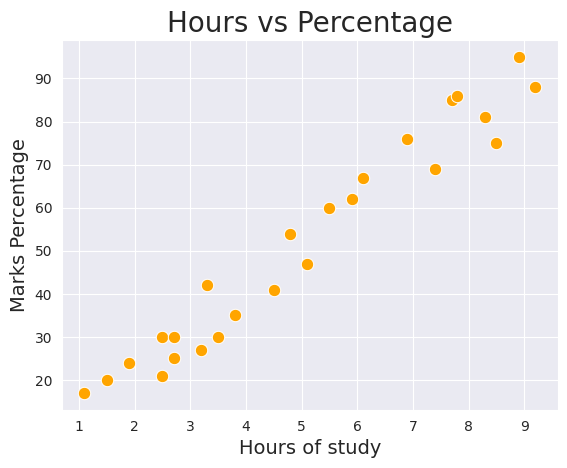

In [60]:
sns.set_style('darkgrid')
sns.scatterplot(x=data['Hours'],y=data['Scores'],color='orange',s=80)
plt.title("Hours vs Percentage",size=20)
plt.xlabel("Hours of study",size=14)
plt.ylabel("Marks Percentage",size=14)
plt.show()

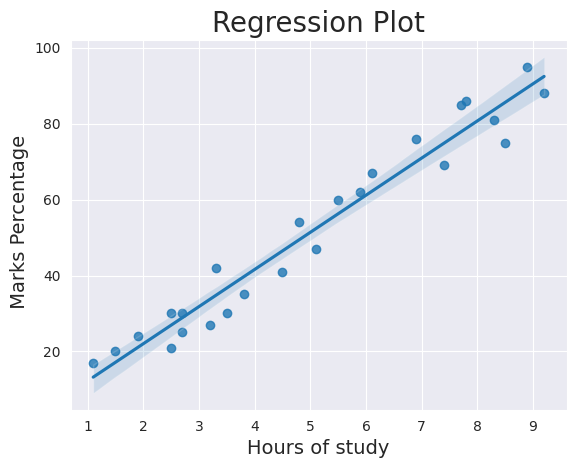

In [61]:
sns.regplot(x=data["Hours"],y=data["Scores"])
plt.title("Regression Plot",size=20)
plt.xlabel("Hours of study",size=14)
plt.ylabel(" Marks Percentage",size=14)
plt.show()

In [62]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The above table shows that two variables are positively connected.

# Training the model

Segregating data into X and Y (Independent and Dependent varaiable)

In [63]:
x=data.iloc[ :, : -1].values
y=data.iloc[ :, 1].values

Splitting data into Train and Test Data

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Training The Model

In [65]:
model=LinearRegression()
model.fit(x_train,y_train)
print('Model training completed')

Model training completed


# Calculating and Plotting Regression Line

Slope:  [9.91065648]
intercept:  2.018160041434662


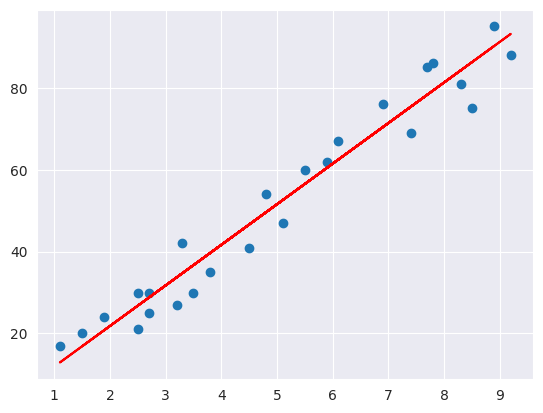

In [66]:
m=model.coef_
n=model.intercept_
line=m*x+n
print("Slope: ",m)
print("intercept: ",n)

plt.scatter(x,y)
plt.plot(x,line,color="red")
plt.show()

Model Scores

In [67]:
print("Training Score: ",model.score(x_train,y_train))
print("Test Score: ",model.score(x_test,y_test))

Training Score:  0.9515510725211552
Test Score:  0.9454906892105354


# Predictions

In [68]:
y_pred=model.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Comparing Actual and Predicted Values

In [69]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
data

,Actual,Predicted,Difference
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


# Testing the Model

In [70]:
SH=float(input("Enter no.of hours studed: "))
Study_hours= [[SH]]
result=model.predict(Study_hours)
print("If the student studies for {0} hours, he may receive a score of {1}%.".format(Study_hours,result))

Enter no.of hours studed: 9.25
If the student studies for [[9.25]] hours, he may receive a score of [93.69173249]%.


# Evaluating the model

In [71]:
print('Mean absolute error',mean_absolute_error(y_test,y_pred))

Mean absolute error 4.183859899002982
